Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Raghav Sharma"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = r5P_pGeMctmcMgznWsSE

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "r5P_pGeMctmcMgznWsSE"

env: QUANDL_API_KEY=r5P_pGeMctmcMgznWsSE


In [36]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date
from pandas.plotting import autocorrelation_plot,scatter_matrix
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

start = pd.datetime(2015, 3, 22)
end = pd.datetime(2020, 3, 22)


data_fb = web.DataReader('WIKI/FB', 'quandl', start, end)
data_mmm = web.DataReader('WIKI/MMM', 'quandl', start, end)
data_ibm = web.DataReader('WIKI/IBM', 'quandl', start, end)
data_amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

## Assumptions

#### Following assumptions and decisions have been made before analysis
1. The approach take is to important data with Quandl. This is primary due to fix_yahoo_finance not being a functional option at all.
2. All the data has been pulled in at the same time with the help if passing a list to the DataReader function
3. All analysis for 60months is being done by setting the end date as today: March 22, 2020. And starting date is set to 60 months in the past, i.e, March 22, 2015

In [4]:
#print(data_fb)
#print(data_mmm)
#print(data_ibm)
#print(data_amzn)


 Data is imported from all 4 stock sources as expected and the primary grouping is done based on Attributes of the stock. We will extract only the Adjusted Close Prices for now

In [5]:
data_fb_adjClose = data_fb.AdjClose
data_mmm_adjClose = data_mmm.AdjClose
data_ibm_adjClose = data_ibm.AdjClose
data_amzn_adjClose = data_amzn.AdjClose

### Note
As seen above there are no null values for any of the stocks. We should be in the clear to run all of our analysis without necessarily making any adjustments


In [6]:
fb_resample_mean = data_fb_adjClose.resample("M").mean()
fb_resample_mean

Date
2015-03-31     83.482857
2015-04-30     82.089762
2015-05-31     79.419750
2015-06-30     83.283409
2015-07-31     92.054773
2015-08-31     91.778571
2015-09-30     91.438095
2015-10-31     97.129545
2015-11-30    105.968750
2015-12-31    105.375000
2016-01-31     98.982105
2016-02-29    105.921000
2016-03-31    110.780455
2016-04-30    111.934286
2016-05-31    118.464762
2016-06-30    115.278636
2016-07-31    119.167500
2016-08-31    124.469130
2016-09-30    128.513333
2016-10-31    129.709524
2016-11-30    120.684762
2016-12-31    118.041905
2017-01-31    126.817500
2017-02-28    133.830526
2017-03-31    139.408261
2017-04-30    142.965263
2017-05-31    150.234091
2017-06-30    152.080909
2017-07-31    160.532500
2017-08-31    169.159130
2017-09-30    170.585000
2017-10-31    173.306818
2017-11-30    179.703500
2017-12-31    177.416500
2018-01-31    184.962857
2018-02-28    180.334205
2018-03-31    175.285789
Freq: M, Name: AdjClose, dtype: float64

In [7]:
mmm_resample_mean = data_mmm_adjClose.resample("M").mean()
mmm_resample_mean

Date
2015-03-31    154.321485
2015-04-30    152.883505
2015-05-31    150.838184
2015-06-30    148.824426
2015-07-31    145.265017
2015-08-31    138.402879
2015-09-30    133.617980
2015-10-31    143.087428
2015-11-30    150.525965
2015-12-31    146.270005
2016-01-31    135.840802
2016-02-29    148.562676
2016-03-31    156.736203
2016-04-30    161.578450
2016-05-31    162.481263
2016-06-30    164.756153
2016-07-31    173.245276
2016-08-31    174.378807
2016-09-30    173.326289
2016-10-31    165.543083
2016-11-30    167.529868
2016-12-31    173.689168
2017-01-31    174.171598
2017-02-28    178.205076
2017-03-31    188.593555
2017-04-30    189.256401
2017-05-31    196.249191
2017-06-30    208.127451
2017-07-31    206.779674
2017-08-31    204.307869
2017-09-30    208.996500
2017-10-31    221.831818
2017-11-30    231.279167
2017-12-31    238.260000
2018-01-31           NaN
2018-02-28           NaN
2018-03-31    232.750000
Freq: M, Name: AdjClose, dtype: float64

In [8]:
ibm_resample_mean = data_ibm_adjClose.resample("M").mean()
ibm_resample_mean

Date
2015-03-31    146.108686
2015-04-30    149.405957
2015-05-31    156.779764
2015-06-30    152.307777
2015-07-31    150.126650
2015-08-31    140.194807
2015-09-30    133.560705
2015-10-31    134.250021
2015-11-30    127.007263
2015-12-31    127.949162
2016-01-31    119.088725
2016-02-29    119.148121
2016-03-31    134.610667
2016-04-30    139.960182
2016-05-31    139.963090
2016-06-30    143.284877
2016-07-31    149.717516
2016-08-31    153.092780
2016-09-30    149.704922
2016-10-31    146.680259
2016-11-30    152.509499
2016-12-31    159.292403
2017-01-31    164.339813
2017-02-28    173.169025
2017-03-31    171.355353
2017-04-30    162.176945
2017-05-31    149.928795
2017-06-30    150.746237
2017-07-31    147.141905
2017-08-31    140.855774
2017-09-30    143.433528
2017-10-31    149.924655
2017-11-30    150.680438
2017-12-31    153.927000
2018-01-31    163.851905
2018-02-28    154.638421
2018-03-31    156.256842
Freq: M, Name: AdjClose, dtype: float64

In [9]:
amzn_resample_mean = data_amzn_adjClose.resample("M").mean()
amzn_resample_mean

Date
2015-03-31     372.108571
2015-04-30     394.212619
2015-05-31     426.927500
2015-06-30     432.599545
2015-07-31     478.709091
2015-08-31     518.464762
2015-09-30     520.945238
2015-10-31     566.743182
2015-11-30     657.695500
2015-12-31     669.262273
2016-01-31     601.061579
2016-02-29     530.620000
2016-03-31     572.374091
2016-04-30     613.594286
2016-05-31     697.473810
2016-06-30     716.390455
2016-07-31     741.467500
2016-08-31     764.839130
2016-09-30     788.965238
2016-10-31     824.439048
2016-11-30     763.335238
2016-12-31     763.325238
2017-01-31     807.505000
2017-02-28     835.745263
2017-03-31     854.240000
2017-04-30     903.405789
2017-05-31     961.707273
2017-06-30     990.424091
2017-07-31    1008.441750
2017-08-31     970.489545
2017-09-30     968.992500
2017-10-31    1000.720000
2017-11-30    1140.154500
2017-12-31    1168.841500
2018-01-31    1309.047143
2018-02-28    1442.702632
2018-03-31    1550.954737
Freq: M, Name: AdjClose, dtype: f

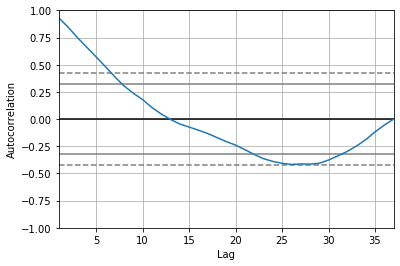

In [10]:
autocorrelation_plot(fb_resample_mean)

### Note: Autocorrelation for FB Stock based on Adjusted Close Price

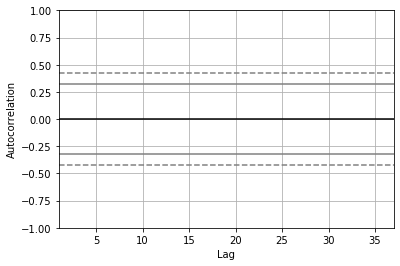

In [11]:
autocorrelation_plot(mmm_resample_mean)

### Note: Autocorrelation for MMM Stock based on Adjusted Close Price

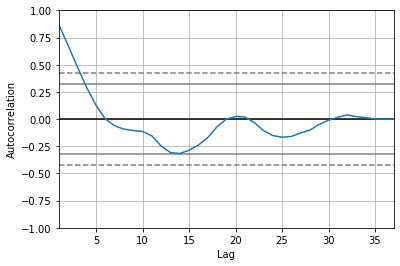

In [12]:
autocorrelation_plot(ibm_resample_mean)

### Note: Autocorrelation for IBM Stock based on Adjusted Close Price

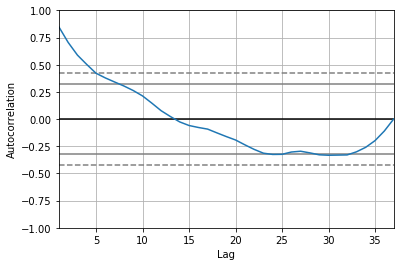

In [13]:
autocorrelation_plot(amzn_resample_mean)

### Note: Autocorrelation for AMZN Stock based on Adjusted Close Price

## Looking at Month-End Returns


In [14]:
fb_month_returns = fb_resample_mean/fb_resample_mean.shift(1)-1
fb_month_returns = fb_month_returns.dropna()
fb_month_returns

Date
2015-04-30   -0.016687
2015-05-31   -0.032526
2015-06-30    0.048649
2015-07-31    0.105319
2015-08-31   -0.003000
2015-09-30   -0.003710
2015-10-31    0.062244
2015-11-30    0.091004
2015-12-31   -0.005603
2016-01-31   -0.060668
2016-02-29    0.070103
2016-03-31    0.045878
2016-04-30    0.010415
2016-05-31    0.058342
2016-06-30   -0.026895
2016-07-31    0.033734
2016-08-31    0.044489
2016-09-30    0.032492
2016-10-31    0.009308
2016-11-30   -0.069577
2016-12-31   -0.021899
2017-01-31    0.074343
2017-02-28    0.055300
2017-03-31    0.041678
2017-04-30    0.025515
2017-05-31    0.050843
2017-06-30    0.012293
2017-07-31    0.055573
2017-08-31    0.053738
2017-09-30    0.008429
2017-10-31    0.015956
2017-11-30    0.036910
2017-12-31   -0.012727
2018-01-31    0.042535
2018-02-28   -0.025025
2018-03-31   -0.027995
Freq: M, Name: AdjClose, dtype: float64

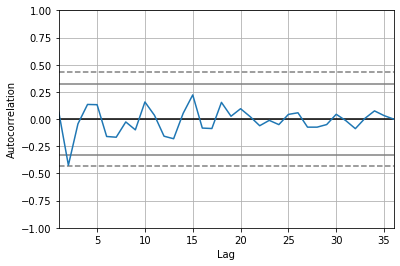

In [15]:
autocorrelation_plot(fb_month_returns)

In [16]:
mmm_month_returns = mmm_resample_mean/mmm_resample_mean.shift(1)-1
mmm_month_returns = mmm_month_returns.dropna()
mmm_month_returns

Date
2015-04-30   -0.009318
2015-05-31   -0.013378
2015-06-30   -0.013350
2015-07-31   -0.023917
2015-08-31   -0.047239
2015-09-30   -0.034572
2015-10-31    0.070870
2015-11-30    0.051986
2015-12-31   -0.028274
2016-01-31   -0.071301
2016-02-29    0.093653
2016-03-31    0.055017
2016-04-30    0.030894
2016-05-31    0.005587
2016-06-30    0.014001
2016-07-31    0.051525
2016-08-31    0.006543
2016-09-30   -0.006036
2016-10-31   -0.044905
2016-11-30    0.012002
2016-12-31    0.036765
2017-01-31    0.002778
2017-02-28    0.023158
2017-03-31    0.058295
2017-04-30    0.003515
2017-05-31    0.036949
2017-06-30    0.060526
2017-07-31   -0.006476
2017-08-31   -0.011954
2017-09-30    0.022949
2017-10-31    0.061414
2017-11-30    0.042588
2017-12-31    0.030184
Freq: M, Name: AdjClose, dtype: float64

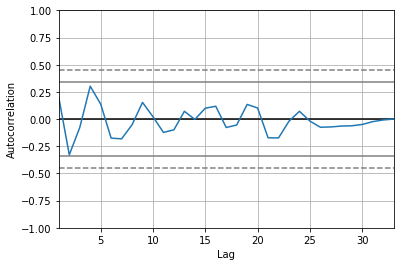

In [17]:
autocorrelation_plot(mmm_month_returns)

In [18]:
ibm_month_returns = ibm_resample_mean/ibm_resample_mean.shift(1)-1
ibm_month_returns = ibm_month_returns.dropna()
ibm_month_returns

Date
2015-04-30    0.022567
2015-05-31    0.049354
2015-06-30   -0.028524
2015-07-31   -0.014321
2015-08-31   -0.066156
2015-09-30   -0.047321
2015-10-31    0.005161
2015-11-30   -0.053950
2015-12-31    0.007416
2016-01-31   -0.069250
2016-02-29    0.000499
2016-03-31    0.129776
2016-04-30    0.039741
2016-05-31    0.000021
2016-06-30    0.023733
2016-07-31    0.044894
2016-08-31    0.022544
2016-09-30   -0.022129
2016-10-31   -0.020204
2016-11-30    0.039741
2016-12-31    0.044475
2017-01-31    0.031686
2017-02-28    0.053725
2017-03-31   -0.010473
2017-04-30   -0.053564
2017-05-31   -0.075523
2017-06-30    0.005452
2017-07-31   -0.023910
2017-08-31   -0.042722
2017-09-30    0.018301
2017-10-31    0.045255
2017-11-30    0.005041
2017-12-31    0.021546
2018-01-31    0.064478
2018-02-28   -0.056231
2018-03-31    0.010466
Freq: M, Name: AdjClose, dtype: float64

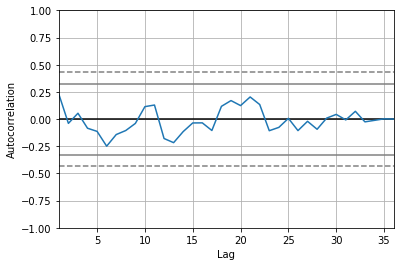

In [19]:
autocorrelation_plot(ibm_month_returns)

In [20]:
amzn_month_returns = amzn_resample_mean/amzn_resample_mean.shift(1)-1
amzn_month_returns = amzn_month_returns.dropna()
amzn_month_returns

Date
2015-04-30    0.059402
2015-05-31    0.082988
2015-06-30    0.013286
2015-07-31    0.106587
2015-08-31    0.083048
2015-09-30    0.004784
2015-10-31    0.087913
2015-11-30    0.160482
2015-12-31    0.017587
2016-01-31   -0.101904
2016-02-29   -0.117195
2016-03-31    0.078689
2016-04-30    0.072016
2016-05-31    0.136702
2016-06-30    0.027122
2016-07-31    0.035005
2016-08-31    0.031521
2016-09-30    0.031544
2016-10-31    0.044962
2016-11-30   -0.074116
2016-12-31   -0.000013
2017-01-31    0.057878
2017-02-28    0.034972
2017-03-31    0.022130
2017-04-30    0.057555
2017-05-31    0.064535
2017-06-30    0.029860
2017-07-31    0.018192
2017-08-31   -0.037635
2017-09-30   -0.001543
2017-10-31    0.032743
2017-11-30    0.139334
2017-12-31    0.025161
2018-01-31    0.119953
2018-02-28    0.102101
2018-03-31    0.075034
Freq: M, Name: AdjClose, dtype: float64

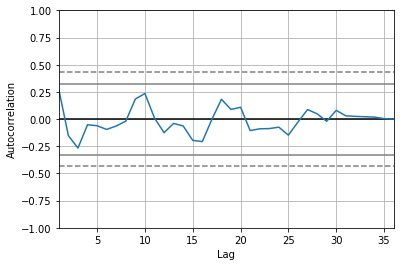

In [21]:
autocorrelation_plot(amzn_month_returns)

In [25]:
fb_resample_mean

Date
2015-03-31     83.482857
2015-04-30     82.089762
2015-05-31     79.419750
2015-06-30     83.283409
2015-07-31     92.054773
2015-08-31     91.778571
2015-09-30     91.438095
2015-10-31     97.129545
2015-11-30    105.968750
2015-12-31    105.375000
2016-01-31     98.982105
2016-02-29    105.921000
2016-03-31    110.780455
2016-04-30    111.934286
2016-05-31    118.464762
2016-06-30    115.278636
2016-07-31    119.167500
2016-08-31    124.469130
2016-09-30    128.513333
2016-10-31    129.709524
2016-11-30    120.684762
2016-12-31    118.041905
2017-01-31    126.817500
2017-02-28    133.830526
2017-03-31    139.408261
2017-04-30    142.965263
2017-05-31    150.234091
2017-06-30    152.080909
2017-07-31    160.532500
2017-08-31    169.159130
2017-09-30    170.585000
2017-10-31    173.306818
2017-11-30    179.703500
2017-12-31    177.416500
2018-01-31    184.962857
2018-02-28    180.334205
2018-03-31    175.285789
Freq: M, Name: AdjClose, dtype: float64

In [39]:
stocks_month_returns = pd.concat([fb_month_returns,mmm_month_returns,ibm_month_returns,amzn_month_returns],axis=1)
stocks_month_returns.columns = ["FB Returns","MMM Returns", "IBM Returns", "AMZN Returns" ]
stocks_month_returns

,FB Returns,MMM Returns,IBM Returns,AMZN Returns
Date,,,,
2015-04-30,-0.016687,-0.009318,0.022567,0.059402
2015-05-31,-0.032526,-0.013378,0.049354,0.082988
2015-06-30,0.048649,-0.013350,-0.028524,0.013286
2015-07-31,0.105319,-0.023917,-0.014321,0.106587
2015-08-31,-0.003000,-0.047239,-0.066156,0.083048
2015-09-30,-0.003710,-0.034572,-0.047321,0.004784
2015-10-31,0.062244,0.070870,0.005161,0.087913
2015-11-30,0.091004,0.051986,-0.053950,0.160482
2015-12-31,-0.005603,-0.028274,0.007416,0.017587


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AAD0ABA848>,
      dtype=object)

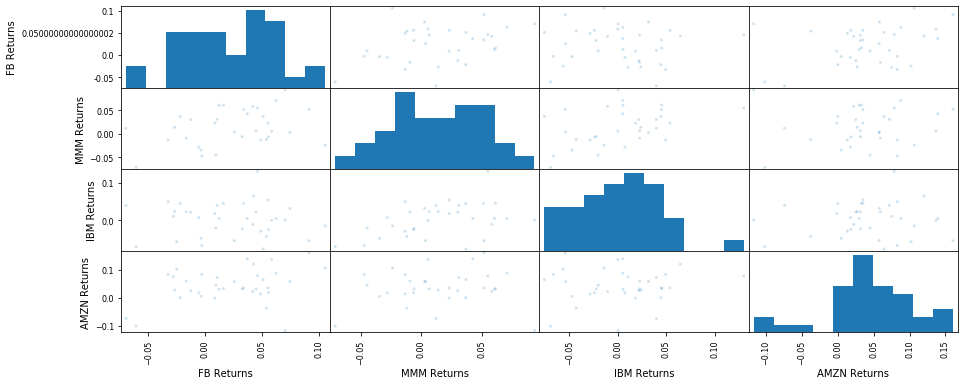

In [40]:
scatter_matrix(stocks_month_returns,alpha=0.2)